# Interval Newton Methods prototype

In [24]:
import numpy as np
from sympy import *
init_printing()
import math
from interval import interval
from interval import imath as im

## 区間ニュートン法

$X^{k+1} = X^{k} \cap N(X^{k}) (k = 0,1,...)$,
where
$N(X) = m(X) - f(m(X))/F^{'}(X) $


### Sympyで関数定義

In [25]:
x,c = symbols("x c")
f = symbols('f', cls=Function)
f = x**3 - 40*x**2 +3000
#f = x**2 - c 
#f = tan((float(3)/2)*pi*x) - sqrt(sin(x)**2 - (float(9)/4)**(-1)) / cos(x)
# init_printing(pretty_print = False)
print str(f)

f

x**3 - 40*x**2 + 3000


### fの微分

In [26]:
# interval[-10, 10].newton(lambda x: x - x**3, lambda x: 1 - 3*x**2)

func = lambda x: eval(str(f))
#func = lambda x: x**2  - interval([3,3])
deriv_eval_str = str(f.diff(x))
deriv_func = lambda x: eval(deriv_eval_str)

In [27]:
func(2)

In [28]:
print func(2)
#print deriv_func(0)

2848


### [PyInterval](http://pyinterval.readthedocs.io/en/latest/_modules/interval.html#interval.newton)でnewton法

In [29]:
sita = interval[-2,3]
im.cos(sita)

In [30]:
X_0 = interval[-14,10]
#print X_0.newton(func, deriv_func)
def tracer_cb(x,y):
    pass
    #print "status : %s, current : %s" % (x,y)

pyinterval_ans = X_0.newton(func, deriv_func, maxiter = 100,tracer_cb=tracer_cb)
pyinterval_ans

### 自分でnewton法を実装

In [31]:
def interval_newton_method(func, deriv_func, current,trace=False,depth=0):
    prefix = ("|" + " "*7)*depth
    if trace: print prefix +"-- start -- current : %s" % str(current)
    for epoch in xrange(30):
        prev = current
        mid = prev.midpoint
        N =  mid - func(mid) / deriv_func(prev)
        current = prev & N
        if trace: print prefix + "current : " + str(current) 
        if len(current) > 1:
            res = [interval_newton_method(func,deriv_func, interval[val],trace, depth+1) for val in current]
            res = reduce(lambda x,y: x|y, res)
            if trace: print prefix + "res : " + str(res) 
            if trace: print prefix
            return res
        elif current == interval(): # これ以上繰り返す必要なし
            if trace: print prefix
            return current
        elif current == prev: # これ以上繰り返す必要なし
            if trace: print prefix + "前回と同じなので終了"
            return current
    if trace: print prefix
    return current

my_func_ans =  interval_newton_method(func, deriv_func, X_0,trace=False)
print "---結果の比較"+"-------"*15
print my_func_ans
print 
print pyinterval_ans


---結果の比較---------------------------------------------------------------------------------------------------------
interval([-7.91287847478, -7.91287847478], [10.0])

interval([-7.91287847478, -7.91287847478], [10.0])


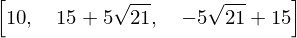

In [32]:
var("x")      # a～zまで変数として扱う
eq = Eq(eval(str(f)), 0)   # 方程式の定義
ans = solve(eq)         # 方程式の解を計算

symbols("x")

ans

### $f = cos(x)$

In [33]:
func = lambda x: im.cos(x)
deriv_func = lambda x: -im.sin(x)

X_0 = interval[-10,10]
print X_0.newton(func,deriv_func)
print 
print interval_newton_method(func,deriv_func,X_0)


interval([-7.85398163397, -7.85398163397], [-4.71238898038, -4.71238898038], [-1.57079632679, -1.57079632679], [1.57079632679, 1.57079632679], [4.71238898038, 4.71238898038], [7.85398163397, 7.85398163397])

interval([-7.85398163397, -7.85398163397], [-4.71238898038, -4.71238898038], [-1.57079632679, -1.57079632679], [1.57079632679, 1.57079632679], [4.71238898038, 4.71238898038], [7.85398163397, 7.85398163397])


In [34]:
func = lambda x: x**2 - interval[2,3]
defiv_func = lambda x: 2*x

X_0 = interval[1,2]
print X_0.newton(func,deriv_func)
print 
print interval_newton_method(func,deriv_func,X_0)


interval()

interval()
